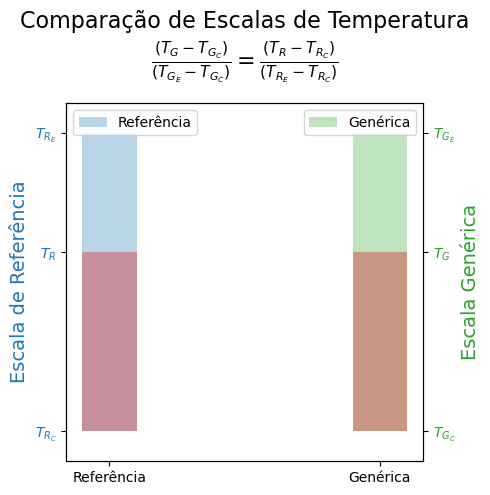

In [1]:
import matplotlib.pyplot as plt

# Definir os pontos de referência
T_R_C = 0     # Temperatura de congelamento na escala de referência (ex: 0°C)
T_R_E = 100   # Temperatura de ebulição na escala de referência (ex: 100°C)
T_G_C = 500   # Temperatura de congelamento na escala genérica
T_G_E = 600   # Temperatura de ebulição na escala genérica

T_R = 60      # Um valor exemplo na escala de referência
T_G = T_G_C + (T_G_E - T_G_C) * (T_R - T_R_C) / (T_R_E - T_R_C)

# Para alinhar os valores de T_R_E com T_G_E e T_R_C com T_G_C na mesma linha horizontal,
# precisamos garantir que os limites dos dois eixos y sejam proporcionais.
# Calculamos o fator de escala e ajustamos os limites do segundo eixo.

# Calcula o fator de escala entre as duas escalas
escala_ref = T_R_E - T_R_C
escala_gen = T_G_E - T_G_C
fator = escala_gen / escala_ref

# Define os limites do eixo de referência
limite_inferior_ref = T_R_C - 10
limite_superior_ref = T_R_E + 10

# Calcula os limites proporcionais para o eixo genérico
limite_inferior_gen = T_G_C + fator * (limite_inferior_ref - T_R_C)
limite_superior_gen = T_G_E + fator * (limite_superior_ref - T_R_E)

fig, ax1 = plt.subplots(figsize=(5, 5))

# Eixo da escala de referência
ax1.set_ylabel('Escala de Referência', color='tab:blue', fontsize=14)
ax1.set_ylim(limite_inferior_ref, limite_superior_ref)
ax1.set_yticks([T_R_C, T_R, T_R_E])
ax1.set_yticklabels([
    r'$T_{R_C}$',
    r'$T_R$',
    r'$T_{R_E}$'
])
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Barras para a escala de referência
ax1.bar(0, T_R_E-T_R_C, bottom=T_R_C, width=0.1, color='tab:blue', alpha=0.3, label='Referência')
ax1.bar(0, T_R-T_R_C, bottom=T_R_C, width=0.1, color='tab:red', alpha=0.4, label='Valor Exemplo')

# Eixo da escala genérica
ax2 = ax1.twinx()
ax2.set_ylabel('Escala Genérica', color='tab:green', fontsize=14)
ax2.set_ylim(limite_inferior_gen, limite_superior_gen)
ax2.set_yticks([T_G_C, T_G, T_G_E])
ax2.set_yticklabels([
    r'$T_{G_C}$',
    r'$T_G$',
    r'$T_{G_E}$'
])
ax2.tick_params(axis='y', labelcolor='tab:green')

# Barras para a escala genérica
ax2.bar(0.5, T_G_E-T_G_C, bottom=T_G_C, width=0.1, color='tab:green', alpha=0.3, label='Genérica')
ax2.bar(0.5, T_G-T_G_C, bottom=T_G_C, width=0.1, color='tab:red', alpha=0.4)

# Legenda e título
fig.suptitle("Comparação de Escalas de Temperatura", fontsize=16)
ax1.legend(['Referência'],loc='upper left')
# ax2.legend(['Genérica', 'Valor Exemplo'], loc='upper right')
ax2.legend(['Genérica'], loc='upper right')

plt.xticks([0, 0.5], ['Referência', 'Genérica'])
plt.tight_layout(rect=[0, 0, 1, 0.90])

# Adiciona a fórmula no topo do gráfico
plt.figtext(0.5, 0.92, 
    r'$\frac{(T_G - T_{G_C})}{(T_{G_E} - T_{G_C})} = \frac{(T_R - T_{R_C})}{(T_{R_E} - T_{R_C})}$',
    ha='center', va='top', fontsize=16, color='black')

plt.show()

